In [347]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

from IPython.display import Image

import re

import random

import numpy as np

from __future__  import division

Penn POS Tags:

https://cs.nyu.edu/grishman/jet/guide/PennPOS.html

#### 1. ☼ Search the web for "spoof newspaper headlines", to find such gems as: British Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant. Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.

In [348]:
sent1 = "British Left Waffles on Falkland Islands"
tokens1 = nltk.word_tokenize(sent1)
nltk.pos_tag(tokens1)

[('British', 'JJ'),
 ('Left', 'NNP'),
 ('Waffles', 'NNP'),
 ('on', 'IN'),
 ('Falkland', 'NNP'),
 ('Islands', 'NNP')]

In [349]:
sent2 = "Juvenile Court to Try Shooting Defendant"
tokens2 = nltk.word_tokenize(sent2)
nltk.pos_tag(tokens2)

[('Juvenile', 'NNP'),
 ('Court', 'NNP'),
 ('to', 'TO'),
 ('Try', 'VB'),
 ('Shooting', 'NNP'),
 ('Defendant', 'NNP')]

The POS tagging did NOT remove the ambiguity.

#### 3. ☼ Tokenize and tag the following sentence: They wind back the clock, while we chase after the wind. What different pronunciations and parts of speech are involved?

In [350]:
sent = "They wind back the clock, while we chase after the wind"
tokens = nltk.word_tokenize(sent)
nltk.pos_tag(tokens)

[('They', 'PRP'),
 ('wind', 'VBP'),
 ('back', 'RB'),
 ('the', 'DT'),
 ('clock', 'NN'),
 (',', ','),
 ('while', 'IN'),
 ('we', 'PRP'),
 ('chase', 'VBP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('wind', 'NN')]

Different part of speech: PRP, VBP, RB, DT, NN, IN.

#### 5. ☼ Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter. Create a dictionary d, and add some entries. What happens if you try to access a non-existent entry, e.g. d['xyz']?

In [351]:
dict1 = dict()# or {}
dict1

{}

In [352]:
dict1['a'] = 1
dict1['b'] = 2
dict1

{'a': 1, 'b': 2}

In [353]:
try:
    dict1['xyz']
except KeyError:
    print "Key not found"

Key not found


Now let's do default dictionaries:

In [354]:
from collections import defaultdict

dict2 = defaultdict(int)
dict2['a'] = 1
dict2['b'] = 2
dict2

defaultdict(int, {'a': 1, 'b': 2})

In [355]:
try:
    print dict2['xyz']
except KeyError:
    print "Key not found"

0


#### 6. ☼ Try deleting an element from a dictionary d, using the syntax del d['abc']. Check that the item was deleted.

In [356]:
dict1

{'a': 1, 'b': 2}

In [357]:
del dict1['a']

In [358]:
dict1

{'b': 2}

Interesting to see how to delete element from dict.

#### 7. ☼ Create two dictionaries, d1 and d2, and add some entries to each. Now issue the command d1.update(d2). What did this do? What might it be useful for?

In [359]:
d1 = {'a':[1,2,3], 'b':'interesting', 'c':{'zzz':1, 'vvv':2}}
d1

{'a': [1, 2, 3], 'b': 'interesting', 'c': {'vvv': 2, 'zzz': 1}}

In [360]:
d2 = {'ggg':2, 'that':'this'}

In [361]:
d1.update(d2)
d1

{'a': [1, 2, 3],
 'b': 'interesting',
 'c': {'vvv': 2, 'zzz': 1},
 'ggg': 2,
 'that': 'this'}

In [362]:
d2

{'ggg': 2, 'that': 'this'}

"d1.update(variable)" is used to add element to dictionaries. Here we update d1 using d2 basically add all element from d2 to d1.

#### 10. ☼ Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?

In [363]:
length = len(nltk.corpus.brown.tagged_sents())
train_size = int(length*0.8)
test_size = int(length*0.2)

In [364]:
# make sure use "int()" to make it integers. 
train_size

45872

In [365]:
training_set_sents = nltk.corpus.brown.tagged_sents()[:train_size]
test_set_sents = nltk.corpus.brown.tagged_sents()[train_size:]


training_set_sents[0]


[(u'The', u'AT'),
 (u'Fulton', u'NP-TL'),
 (u'County', u'NN-TL'),
 (u'Grand', u'JJ-TL'),
 (u'Jury', u'NN-TL'),
 (u'said', u'VBD'),
 (u'Friday', u'NR'),
 (u'an', u'AT'),
 (u'investigation', u'NN'),
 (u'of', u'IN'),
 (u"Atlanta's", u'NP$'),
 (u'recent', u'JJ'),
 (u'primary', u'NN'),
 (u'election', u'NN'),
 (u'produced', u'VBD'),
 (u'``', u'``'),
 (u'no', u'AT'),
 (u'evidence', u'NN'),
 (u"''", u"''"),
 (u'that', u'CS'),
 (u'any', u'DTI'),
 (u'irregularities', u'NNS'),
 (u'took', u'VBD'),
 (u'place', u'NN'),
 (u'.', u'.')]

In [366]:
# train unigram taggers
unigram_tagger = nltk.UnigramTagger(training_set_sents)
unigram_tagger

<UnigramTagger: size=51461>

In [367]:
# Use trained unigram taggers to tag sentence

unigram_tagger.tag(nltk.corpus.brown.sents()[2])

[(u'The', u'AT'),
 (u'September-October', u'NP'),
 (u'term', u'NN'),
 (u'jury', u'NN'),
 (u'had', u'HVD'),
 (u'been', u'BEN'),
 (u'charged', u'VBN'),
 (u'by', u'IN'),
 (u'Fulton', u'NP-TL'),
 (u'Superior', u'JJ-TL'),
 (u'Court', u'NN-TL'),
 (u'Judge', u'NN-TL'),
 (u'Durwood', u'NP'),
 (u'Pye', u'NP'),
 (u'to', u'TO'),
 (u'investigate', u'VB'),
 (u'reports', u'NNS'),
 (u'of', u'IN'),
 (u'possible', u'JJ'),
 (u'``', u'``'),
 (u'irregularities', u'NNS'),
 (u"''", u"''"),
 (u'in', u'IN'),
 (u'the', u'AT'),
 (u'hard-fought', u'JJ'),
 (u'primary', u'JJ'),
 (u'which', u'WDT'),
 (u'was', u'BEDZ'),
 (u'won', u'VBD'),
 (u'by', u'IN'),
 (u'Mayor-nominate', u'NN-TL'),
 (u'Ivan', u'NP'),
 (u'Allen', u'NP'),
 (u'Jr.', u'NP'),
 (u'.', u'.')]

In [368]:
# Look at accuracy score
unigram_tagger.evaluate(test_set_sents)


0.8771110352197239

#### Let's combine multiple taggers

In [369]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(training_set_sents, backoff=t0)
t2 = nltk.BigramTagger(training_set_sents, backoff=t1)
t2.evaluate(test_set_sents)

0.9071034338404592

As you can see combining different taggers together will improve accuracy score

#### What if we add trigram?

In [370]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(training_set_sents, backoff=t0)
t2 = nltk.BigramTagger(training_set_sents, backoff=t1)
t3 = nltk.TrigramTagger(training_set_sents, backoff=t1)
t3.evaluate(test_set_sents)

0.9009727562160554

In this case trigram perform the same as bigram.

#### 15. ◑ Write programs to process the Brown Corpus and find answers to the following questions:

1. Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)
2. Which word has the greatest number of distinct tags. What are they, and what do they represent?
3. List tags in order of decreasing frequency. What do the 20 most frequent tags represent?
4. Which tags are nouns most commonly found after? What do these tags represent?

First get the tags for all words and see the most common ones:

In [371]:
word_tags = nltk.corpus.brown.tagged_words()
word_tags[:10]

[(u'The', u'AT'),
 (u'Fulton', u'NP-TL'),
 (u'County', u'NN-TL'),
 (u'Grand', u'JJ-TL'),
 (u'Jury', u'NN-TL'),
 (u'said', u'VBD'),
 (u'Friday', u'NR'),
 (u'an', u'AT'),
 (u'investigation', u'NN'),
 (u'of', u'IN')]

In [372]:
tag_freq = nltk.FreqDist([tag for (word, tag) in word_tags])
tag_most_common = tag_freq.most_common()
tag_most_common[:10]

[(u'NN', 152470),
 (u'IN', 120557),
 (u'AT', 97959),
 (u'JJ', 64028),
 (u'.', 60638),
 (u',', 58156),
 (u'NNS', 55110),
 (u'CC', 37718),
 (u'RB', 36464),
 (u'NP', 34476)]

In [373]:
training_set_sents = nltk.corpus.brown.tagged_sents()[:train_size]
test_set_sents = nltk.corpus.brown.tagged_sents()[train_size:]


type(training_set_sents)


nltk.collections.LazySubsequence

In [374]:
training_set_words = nltk.corpus.brown.tagged_words()[:train_size]
test_set_sents = nltk.corpus.brown.tagged_sents()[train_size:]


training_set_words[:100]

[(u'The', u'AT'), (u'Fulton', u'NP-TL'), ...]

In [375]:
type(training_set_words)

nltk.collections.LazySubsequence

In [376]:
word_tag_nn = [word for (word, tag) in 
               nltk.corpus.brown.tagged_words()
               if tag == 'NN'
               ]
word_tag_nn_fd = nltk.FreqDist(word_tag_nn)

In [377]:
plural_singular = [word for word in word_tag_nn_fd.keys()
                   if word_tag_nn_fd[word] < word_tag_nn_fd[word+'s']]

In [378]:
plural_singular

[u'ethic', u'metaphysic', u'barrack', u'mean', u'bicep', u'headquarter']

Let's check the results:

In [379]:
word_tag_nn_fd['ethic']

4

In [380]:
word_tag_nn_fd['ethics']

6

In [381]:
print word_tag_nn_fd['mean'], word_tag_nn_fd['means']

12 74


In [382]:
distinct_word_tag = set([(word, tag) for (word, tag) in
                         nltk.corpus.brown.tagged_words()
                        ])


In [383]:
distict_tags_per_word = [word for (word, tag) in distinct_word_tag]
distict_tags_per_word = nltk.FreqDist(distict_tags_per_word)
distict_tags_per_word.most_common()[:5]

[(u'that', 12), (u'A', 11), (u'in', 10), (u'to', 10), (u':', 9)]

It turns out that the word "that" has the most tags

In [384]:
tags_for_word_that = set([tag for (word, tag) in 
                          nltk.corpus.brown.tagged_words()
                          if word == 'that'])
tags_for_word_that

{u'CS',
 u'CS-HL',
 u'CS-NC',
 u'DT',
 u'DT-NC',
 u'NIL',
 u'QL',
 u'WPO',
 u'WPO-NC',
 u'WPS',
 u'WPS-HL',
 u'WPS-NC'}

Not sure what these means. Searched a few lists they don't have 'CS', 'WPO', etc..

In [385]:
tags = [tag for (word, tag) in nltk.corpus.brown.tagged_words()]
tag_freq = nltk.FreqDist(tags)
tag_most_common = tag_freq.most_common()
tag_most_common[:20]

[(u'NN', 152470),
 (u'IN', 120557),
 (u'AT', 97959),
 (u'JJ', 64028),
 (u'.', 60638),
 (u',', 58156),
 (u'NNS', 55110),
 (u'CC', 37718),
 (u'RB', 36464),
 (u'NP', 34476),
 (u'VB', 33693),
 (u'VBN', 29186),
 (u'VBD', 26167),
 (u'CS', 22143),
 (u'PPS', 18253),
 (u'VBG', 17893),
 (u'PP$', 16872),
 (u'TO', 14918),
 (u'PPSS', 13802),
 (u'CD', 13510)]

How about write this in one single statement?

In [386]:
nltk.FreqDist([tag for (word, tag) 
                          in nltk.corpus.brown.tagged_words()
              ]).most_common()[:20]


[(u'NN', 152470),
 (u'IN', 120557),
 (u'AT', 97959),
 (u'JJ', 64028),
 (u'.', 60638),
 (u',', 58156),
 (u'NNS', 55110),
 (u'CC', 37718),
 (u'RB', 36464),
 (u'NP', 34476),
 (u'VB', 33693),
 (u'VBN', 29186),
 (u'VBD', 26167),
 (u'CS', 22143),
 (u'PPS', 18253),
 (u'VBG', 17893),
 (u'PP$', 16872),
 (u'TO', 14918),
 (u'PPSS', 13802),
 (u'CD', 13510)]

#### 20. ◑ Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:

1. Produce an alphabetically sorted list of the distinct words tagged as MD.
2. Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).
3. Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab).
4. What is the ratio of masculine to feminine pronouns?

In [387]:
sorted(set([word for (word, tag) 
            in nltk.corpus.brown.tagged_words()
            if tag == 'MD']))

[u'Can',
 u'Could',
 u'May',
 u'Might',
 u'Must',
 u'Ought',
 u'Shall',
 u'Should',
 u'Will',
 u'Would',
 u"c'n",
 u'can',
 u'colde',
 u'could',
 u'dare',
 u'kin',
 u'maht',
 u'mai',
 u'may',
 u'maye',
 u'mayst',
 u'might',
 u'must',
 u'need',
 u'ought',
 u'shall',
 u'should',
 u'shuld',
 u'shulde',
 u'wil',
 u'will',
 u'wilt',
 u'wod',
 u'wold',
 u'wolde',
 u'would']

In [388]:
unique_word_tag = set([(word, tag) for (word, tag)
                       in nltk.corpus.brown.tagged_words()
                       if word.endswith('s')])

In [389]:
x = {}
for tup in unique_word_tag:
    x.setdefault(tup[0], []).append(tup[1])
x['flies'] # check the value of one key since the dict is too big

[u'VBZ', u'VBZ-HL', u'NNS']

In [390]:
nns_vbz_words = [ele for ele in x 
                 if x[ele] == ['NNS', 'VBZ']]
nns_vbz_words[:3]

[u'tires', u'kids', u'purges']

In [391]:
# Let's test the resut with words we found
set([(word, tag) for (word, tag) 
     in nltk.corpus.brown.tagged_words()
     if word == 'tires'])

{(u'tires', u'NNS'), (u'tires', u'VBZ')}

#### !!!!

#### 21. ◑ In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs that appear before these four verbs.

In [416]:
word_list = ['think', 'love', 'like', 'prefer']

adverb_list = [(w1, w2) for (w1, t1), (w2, t2) 
 in list(nltk.ngrams(nltk.corpus.brown.tagged_words(), 2))
 if w2 in word_list
 if t1 == 'RB']

# sort the list by 2nd element in each tuple
sorted(adverb_list, key=lambda x:x[1])

[(u'just', u'like'),
 (u'always', u'like'),
 (u'together', u'like'),
 (u'just', u'like'),
 (u'somewhat', u'like'),
 (u'increasingly', u'like'),
 (u'just', u'like'),
 (u'around', u'like'),
 (u'just', u'like'),
 (u'much', u'like'),
 (u'much', u'like'),
 (u'somewhat', u'like'),
 (u'just', u'like'),
 (u'just', u'like'),
 (u'much', u'like'),
 (u'around', u'like'),
 (u'jist', u'like'),
 (u'much', u'like'),
 (u'much', u'like'),
 (u'exactly', u'like'),
 (u'roughly', u'like'),
 (u'together', u'like'),
 (u'so', u'like'),
 (u'gloriously', u'like'),
 (u'somewhat', u'like'),
 (u'deceptively', u'like'),
 (u'remarkably', u'like'),
 (u'just', u'like'),
 (u'just', u'like'),
 (u'simply', u'like'),
 (u'close', u'like'),
 (u'together', u'like'),
 (u'just', u'like'),
 (u'exactly', u'like'),
 (u'much', u'like'),
 (u'quick', u'like'),
 (u'alone', u'like'),
 (u'here', u'like'),
 (u'particularly', u'like'),
 (u'just', u'like'),
 (u'Kinda', u'like'),
 (u'just', u'like'),
 (u'just', u'like'),
 (u'always', u'like

#### 24. ◑ How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of 105 and a tagset size of 102.

In [427]:
length = len(nltk.corpus.brown.tagged_sents())
train_size = int(length*0.8)
test_size = int(length*0.2)

training_set_sents = nltk.corpus.brown.tagged_sents()[:train_size]
test_set_sents = nltk.corpus.brown.tagged_sents()[train_size:]

def ngramtagger_accuracy_score(ngramtagger):
    tagger = ngramtagger(training_set_sents)
    print tagger.evaluate(test_set_sents)



In [426]:
# train unigram taggers
ngramtagger_accuracy_score(nltk.UnigramTagger)

0.87711103522


In [428]:
# train bigram taggers
ngramtagger_accuracy_score(nltk.BigramTagger)

0.339175746092


In [429]:
# train trigram taggers
ngramtagger_accuracy_score(nltk.TrigramTagger)

0.191813645027


#### 26. ◑ 4.1 plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

In [442]:
def accuracy_score_size(size):
    """
    For different size, test the UnigramTagger accuracy score.
    Force the size to be two decimal points by using round(wor, 2)
    """
    size = round(size, 2)
    length = len(nltk.corpus.brown.tagged_sents())
    train_size = int(length*size)
    test_size = int(length*size)
    
    train_data_set = nltk.corpus.brown.tagged_sents()[:train_size]
    test_data_set = nltk.corpus.brown.tagged_sents()[train_size:]
    
    tagger = nltk.UnigramTagger(train_data_set)
    print tagger.evaluate(test_data_set)

In [443]:
accuracy_score_size(0.2)

0.840070397175


In [444]:
accuracy_score_size(0.4)

0.863411751906


In [447]:
size_list = [0.2, 0.4, 0.6, 0.8, 0.9]
accuracy_score_list = [accuracy_score_size(size) for size in size_list]

0.840070397175
0.863411751906
0.869686554676
0.87711103522
0.885218247732


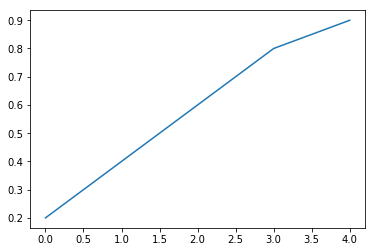

In [456]:
import matplotlib.pyplot as plt
%matplotlib inline

size_score = zip(size_list, accuracy_score_list)
plt.plot(size_score)

In [445]:
cfd = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(categories='news'))
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {u'sunbonnet': FreqDist({u'NN': 1}),
                     u'Elevated': FreqDist({u'VBN-TL': 1}),
                     u'narcotic': FreqDist({u'JJ': 1, u'NN': 1}),
                     u'four': FreqDist({u'CD': 73}),
                     u'woods': FreqDist({u'NNS': 4}),
                     u'railing': FreqDist({u'NN': 1}),
                     u'Until': FreqDist({u'CS': 3, u'IN': 2}),
                     u'aggression': FreqDist({u'NN': 1}),
                     u'marching': FreqDist({u'VBG': 2}),
                     u'increase': FreqDist({u'NN': 15, u'VB': 8, u'VB-HL': 1}),
                     u'eligible': FreqDist({u'JJ': 4}),
                     u'electricity': FreqDist({u'NN': 1}),
                     u'$25-a-plate': FreqDist({u'NN': 1}),
                     u'wheeled': FreqDist({u'VBD': 2}),
                     u'Casey': FreqDist({u'NP': 6}),
                     u'all-county': FreqDist({u'JJ': 1}),
         

In [446]:
fd = nltk.FreqDist(nltk.corpus.brown.tagged_words(categories='news'))
fd

FreqDist({(u'putt', u'VB'): 1,
          (u'course', u'NN'): 24,
          (u'fiery', u'JJ'): 1,
          (u"Redbirds'", u'NPS$'): 1,
          (u'Board', u'NN-HL'): 1,
          (u'decolletage', u'NN'): 1,
          (u'usual', u'JJ'): 5,
          (u'tears', u'NNS'): 1,
          (u'Kershbaum', u'NP'): 1,
          (u'Said', u'VBD'): 2,
          (u'implication', u'NN'): 1,
          (u'Retail', u'JJ-TL'): 1,
          (u'minor', u'NN'): 1,
          (u'Audubon', u'NP-TL'): 3,
          (u'competitor', u'NN'): 1,
          (u'failed', u'VBD'): 14,
          (u'Aaron', u'NP'): 1,
          (u'policeman', u'NN'): 2,
          (u'markets', u'NNS'): 1,
          (u'Further', u'JJR'): 2,
          (u'close', u'VB'): 2,
          (u'filed', u'VBN'): 4,
          (u'grasp', u'NN'): 1,
          (u'Conference', u'NN-TL'): 2,
          (u'prone', u'JJ'): 2,
          (u'Decathlon', u'NN-TL'): 1,
          (u'against', u'IN'): 76,
          (u'To', u'TO'): 15,
          (u'Dodge', u'NP'): 3,
 